In [1]:
import numpy as np
A = np.matrix([
[0, 1, 0, 0],
[0, 0, 1, 1],
[0, 1, 0, 0],
[1, 0, 1, 0]],
dtype=float
)

In [2]:
X = np.matrix([
[i, -i]
for i in range(A.shape[0])
], dtype=float)

In [3]:
X

matrix([[ 0.,  0.],
        [ 1., -1.],
        [ 2., -2.],
        [ 3., -3.]])

In [4]:
A * X  # aggregation step, the rows are sum of features of neighborhood nodes of the focal node

matrix([[ 1., -1.],
        [ 5., -5.],
        [ 1., -1.],
        [ 2., -2.]])

In [5]:
I = np.matrix(np.eye(A.shape[0]))
I

matrix([[1., 0., 0., 0.],
        [0., 1., 0., 0.],
        [0., 0., 1., 0.],
        [0., 0., 0., 1.]])

In [6]:
A_hat = A + I   # adding self-loops to each node, so that its own features get added as well
A_hat * X

matrix([[ 1., -1.],
        [ 6., -6.],
        [ 3., -3.],
        [ 5., -5.]])

In [7]:
D = np.array(np.sum(A, axis=0))[0]
D = np.matrix(np.diag(D))
D

matrix([[1., 0., 0., 0.],
        [0., 2., 0., 0.],
        [0., 0., 2., 0.],
        [0., 0., 0., 1.]])

In [8]:
D**-1 * A  # Normalizing by multiplying with node degree inverse matrix, weights (the values) in each row of the adjacency
           # matrix have been divided by the degree of the node corresponding to the row.

matrix([[0. , 1. , 0. , 0. ],
        [0. , 0. , 0.5, 0.5],
        [0. , 0.5, 0. , 0. ],
        [1. , 0. , 1. , 0. ]])

In [9]:
D**-1 * A * X # node representations corresponding to the mean of the features of neighboring nodes

matrix([[ 1. , -1. ],
        [ 2.5, -2.5],
        [ 0.5, -0.5],
        [ 2. , -2. ]])

In [10]:
W = np.matrix([
[1, -1],
[-1, 1]])
D_hat = np.array(np.sum(A_hat, axis=0))[0]
D_hat = np.matrix(np.diag(D_hat))
D_hat**-1 * A_hat * X * W

matrix([[ 1., -1.],
        [ 4., -4.],
        [ 2., -2.],
        [ 5., -5.]])

In [ ]:
W = np.matrix([
[1, -1],
[-1, 1]
])
relu(D_hat**-1 * A_hat * X * W)

In [11]:
from networkx import karate_club_graph, to_numpy_matrix
zkc = karate_club_graph()
order = sorted(list(zkc.nodes()))
A = to_numpy_matrix(zkc, nodelist=order)
I = np.eye(zkc.number_of_nodes())
A_hat = A + I
D_hat = np.array(np.sum(A_hat, axis=0))[0]
D_hat = np.matrix(np.diag(D_hat))

In [12]:
import numpy as np
W_1 = np.random.normal(
loc=0, scale=1, size=(zkc.number_of_nodes(), 4))
W_2 = np.random.normal(
loc=0, size=(W_1.shape[1], 2))
print(W_1)
print(W_2)

[[-0.28411331 -0.5877636  -0.13186734  0.26957002]
 [ 1.41037636 -1.76057503 -0.35851621 -0.48388847]
 [-0.66943939 -0.59414005  0.74551312 -0.86607812]
 [-1.42643331  0.56889389 -0.61938461  0.05406269]
 [ 1.70150268 -0.61467816  0.19515931 -1.14274086]
 [ 0.7839563   0.77009504  1.88371538  1.45247433]
 [-0.18724254  0.87013188 -0.60401699 -2.15817176]
 [-0.03826618 -0.58912314 -0.42518231  0.01130105]
 [-0.35654329 -0.65252821  0.3013118  -1.12715343]
 [ 1.03958521  0.3204367   0.10556477 -0.14716962]
 [-0.43464088 -1.04503409 -1.61290533 -0.37793519]
 [-0.80098914 -0.1015106  -0.30426043  0.94668107]
 [-1.04842602 -0.51142654  0.3768901   0.56541062]
 [ 0.64855952 -0.84213442 -1.23840713  1.36334231]
 [-1.30515029  1.91509383 -1.40261371  0.01895369]
 [-0.19602068  0.73970908  0.58940358  0.33735623]
 [ 0.71720172  1.27723796 -0.53338574  2.58047236]
 [ 0.75164387 -0.465787   -0.11485231 -1.51962501]
 [-0.24659314 -1.83097504  0.48629131  0.10958584]
 [-0.48049814 -0.34121809 -2.00

In [13]:
def gcn_layer(A_hat, D_hat, X, W):
    return (D_hat**-1 * A_hat * X * W)

In [14]:
H_1 = gcn_layer(A_hat, D_hat, I, W_1)
H_2 = gcn_layer(A_hat, D_hat, H_1, W_2)

In [15]:
output = H_2

In [16]:
feature_representations = {
node: np.array(output)[node]
for node in zkc.nodes()}
feature_representations

{0: array([ 0.05488712, -0.29730244]),
 1: array([ 0.17968352, -0.70260413]),
 2: array([ 0.03482605, -0.17738651]),
 3: array([ 0.03562974, -0.18580038]),
 4: array([ 0.26415947, -0.83473136]),
 5: array([-0.09178258,  0.20491434]),
 6: array([-0.13426489,  0.13879582]),
 7: array([ 0.17272608, -0.53940823]),
 8: array([ 0.03020578, -0.31928995]),
 9: array([-0.05255735,  0.01738386]),
 10: array([ 0.14877179, -0.60648274]),
 11: array([-0.07327272,  0.16466289]),
 12: array([-0.01322121,  0.0296052 ]),
 13: array([ 0.04010667, -0.26649225]),
 14: array([-0.67676885,  1.06822069]),
 15: array([-0.35607365,  0.52619983]),
 16: array([-0.40809148,  0.98555062]),
 17: array([ 0.44399295, -1.35604702]),
 18: array([-0.11910635,  0.00332429]),
 19: array([-0.07627554, -0.18086483]),
 20: array([-0.30371094,  0.2974875 ]),
 21: array([ 0.22523988, -0.80110704]),
 22: array([-0.08773674, -0.15837998]),
 23: array([-0.00548353, -0.1250816 ]),
 24: array([ 0.21007893, -0.29285251]),
 25: array

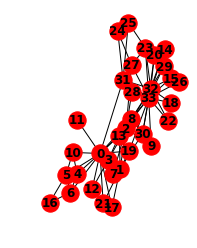

In [18]:
import matplotlib.pyplot as plt
import networkx as nx
plt.subplot(121)
nx.draw(zkc, with_labels=True, font_weight='bold')